# Cryptocurrency Correlation

In this noteboook we explore the correlation between various cryptocurrencies as well as between cryptocurrencies and conventional currencies.

In [1]:
library(moments)
library(data.table)
library(dplyr)
library(stats)
library(reshape2)
library(ggplot2)
library(zoo)
library(ggcorrplot)
library(igraph)

Sys.setlocale("LC_TIME", "en_US.UTF-8")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘igraph’

The following objects are masked from ‘package:dplyr’:

    %>%, as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "en_US.UTF-8"

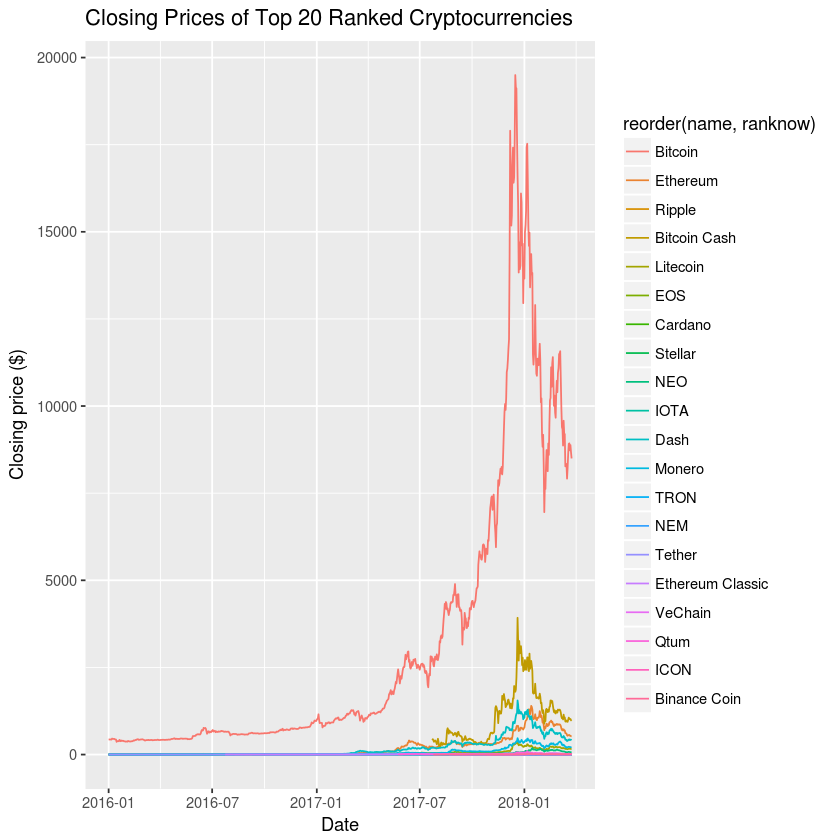

In [2]:
df = read.csv(file="data/crypto-markets.csv", header=TRUE)

# convert the column to Date
df$date <- as.Date(df$date, "%Y-%m-%d")

# Extract the top 20 currencies and take a sane date range...
filtereddf <- df %>% select(name, date, ranknow, close) %>% filter(ranknow <= 20, date >= "2016-01-01")

 #... and plot them,
print(ggplot(filtereddf) + 
        geom_line(aes(x = date, y = close, colour = reorder(name, ranknow)))+
        ggtitle("Closing Prices of Top 20 Ranked Cryptocurrencies")+
        ylab("Closing price ($)") + xlab("Date"))

In [3]:
# Pivot the dataframe in order to process it more easily
pivotdf <- dcast(filtereddf, date ~ name, value.var = "close")

# Remove spaces and replace with ".". This is to prevent problems later on ...
colnames(pivotdf) <- gsub(" ", ".", colnames(pivotdf))

logrets<-data.frame(
            diff(as.matrix(log(pivotdf[,-1])))
        )
means <- data.frame(apply(logrets, 2, mean, na.rm=TRUE))
medians <- data.frame(apply(logrets, 2, mean, na.rm=TRUE))

stats <- cbind(means, data.frame(apply(logrets, 2, mean, na.rm=TRUE))[,1], 
               data.frame(apply(logrets, 2, min, na.rm=TRUE))[,1],
               data.frame(apply(logrets, 2, max, na.rm=TRUE))[,1],
               data.frame(apply(logrets, 2, sd, na.rm=TRUE))[,1],
               data.frame(apply(logrets, 2, skewness, na.rm=TRUE))[,1],
               data.frame(apply(logrets, 2, kurtosis, na.rm=TRUE))[,1])
colnames(stats) <- c("Mean", "Median", "Min", "Max", "Std. Dev", "Skewness", "Kurtosis")
stats

,Mean,Median,Min,Max,Std. Dev,Skewness,Kurtosis
Binance.Coin,1.972603e-02,1.972603e-02,-0.40863468,0.67517385,0.128922605,0.8752841,7.045211
Bitcoin,3.652973e-03,3.652973e-03,-0.20752981,0.22511900,0.042197742,-0.1675597,7.633704
Bitcoin.Cash,3.471353e-03,3.471353e-03,-0.44603820,0.43158192,0.113678160,0.5687321,6.249159
Cardano,1.143190e-02,1.143190e-02,-0.28868471,0.86154290,0.137410456,2.3956939,14.065863
Dash,5.900046e-03,5.900046e-03,-0.24322502,0.43774585,0.064141552,0.9201530,8.943457
EOS,6.984734e-03,6.984734e-03,-0.38504385,0.98699830,0.122521087,2.1610993,18.294709
Ethereum,7.758502e-03,7.758502e-03,-0.31546865,0.30277037,0.069022956,0.2852880,6.598432
Ethereum.Classic,4.875544e-03,4.875544e-03,-0.46608973,1.44292364,0.102266449,4.4243731,68.822370
ICON,1.311864e-02,1.311864e-02,-0.38711597,0.46509529,0.143293353,0.3179341,4.174327
IOTA,2.823973e-03,2.823973e-03,-0.37704575,0.38395890,0.106671336,0.1299428,5.219895


Given the Skeness and Kurtosis values, it appears that, in general, we cannot consider the log returns to be distributed normally. We confirm this using the Shapiro-Wilk test. 

In [4]:
test.results.normal <- apply(logrets, MARGIN=2, FUN=shapiro.test)
sapply(test.results.normal, FUN=function(x){return(x$p.value)}, simplify=TRUE)

Binance.Coin          Bitcoin     Bitcoin.Cash          Cardano 
    1.446096e-09     2.823082e-21     1.461585e-09     1.239058e-13 
            Dash              EOS         Ethereum Ethereum.Classic 
    3.381529e-21     7.404749e-15     2.700307e-19     2.399330e-31 
            ICON             IOTA         Litecoin           Monero 
    7.924043e-03     2.193581e-06     4.206368e-30     2.930971e-20 
             NEM              NEO             Qtum           Ripple 
    6.743294e-28     3.205410e-21     3.233883e-13     1.030307e-36 
         Stellar           Tether             TRON          VeChain 
    8.568863e-29     3.938200e-39     2.499934e-10     6.918898e-07

The null-hypothesis of the Shapiro-Wilk test is that the distribution is normal, therefore the Shapiro-Wilk test confirms that the distribution of the log-returns is not normal. 

Next we visualise some example log return distributions superimposed on a generated normal distribution.

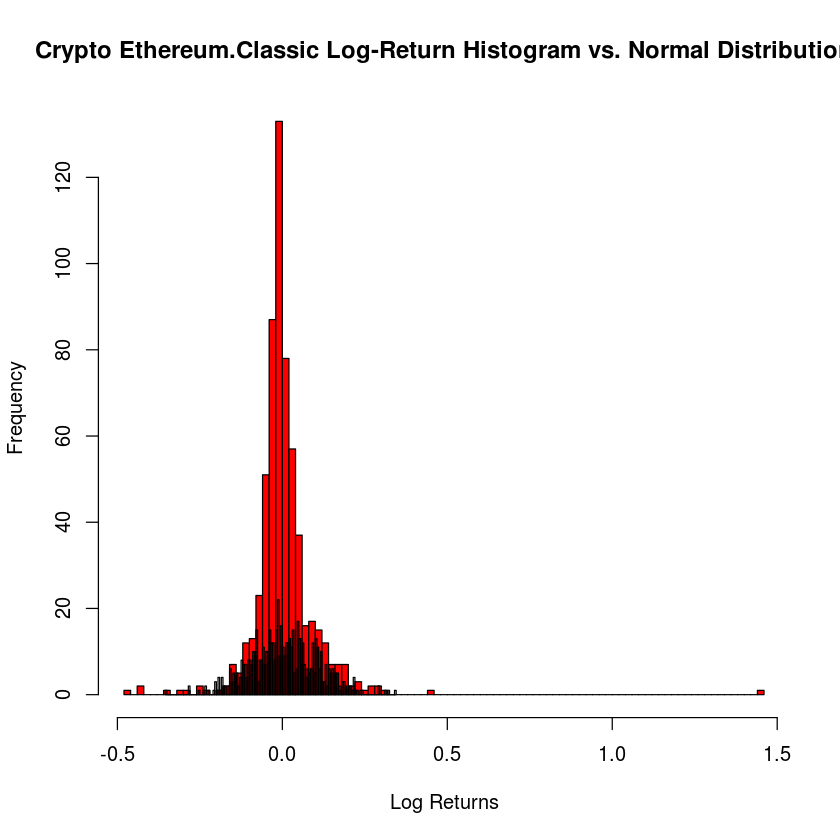

In [5]:
plot.normal.hist <- function(currency) {
    hist(logrets[,currency], breaks=100, col="#ff0000",
               main=paste("Crypto", currency, "Log-Return Histogram vs. Normal Distribution"), xlab="Log Returns")
    hist(rnorm(length(logrets[!is.na(logrets[currency]),currency]), mean = stats[currency, "Mean"], 
               sd = stats[currency, "Std. Dev"]), breaks=100, add=TRUE)
}

plot.normal.hist("Ethereum.Classic")

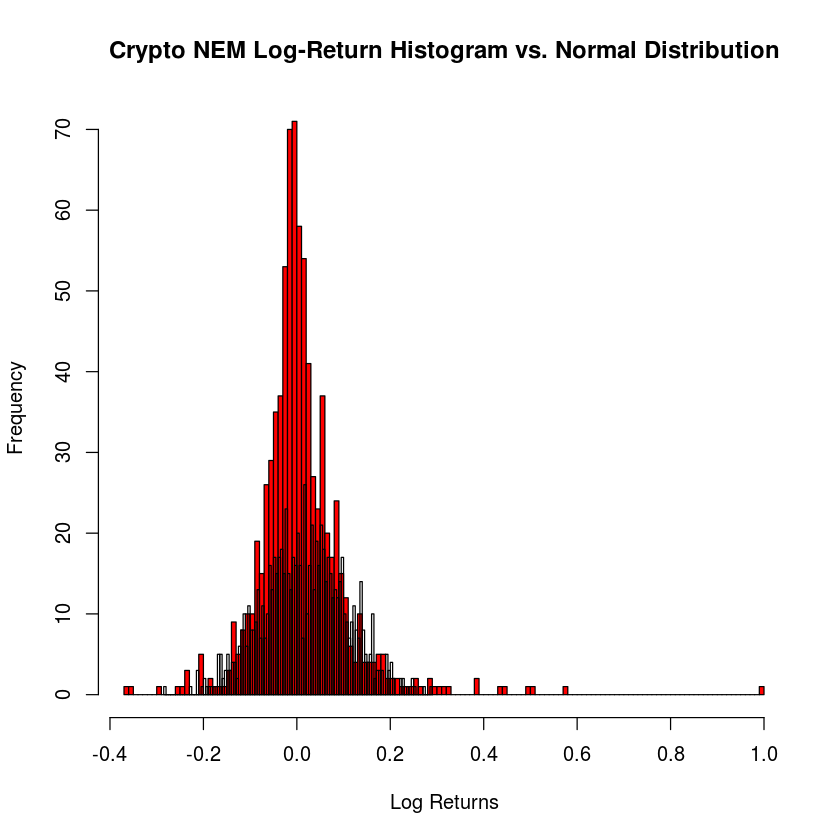

In [6]:

plot.normal.hist("NEM")

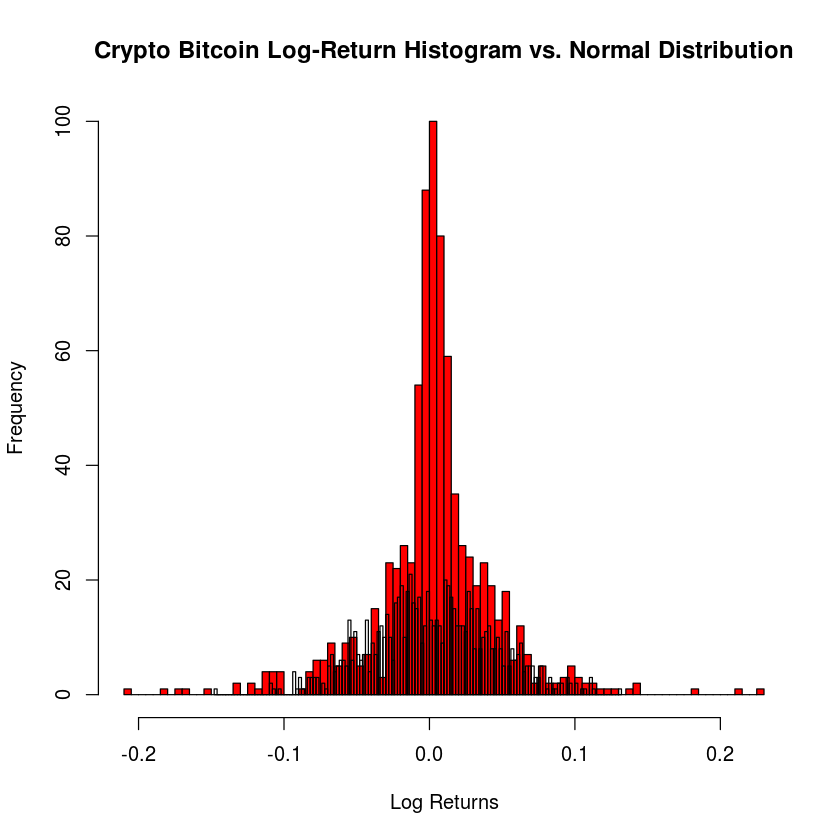

In [7]:

plot.normal.hist("Bitcoin")

Function **correlationTable()** generates a matrix of cross-crrelation values between each pair of currencies in *graphs*. It also returns a parallel matrix of p-values for each correlation.
We use the Kendall correlation coefficient as it is preferible to either Pearson or Spearman for non-normal variables.

Function **crossCorrelationTable()** performs the same job as **correlationTable**, however it uses the Cross-Correlation Function **ccf()** instead of Kendall correlation. The ccf() function can find correlations between time series with time-lag, so that if a series lags behind or leads another by a give maximum amount of time it is also detected.

In [8]:
correlationTable = function(graphs) {
  cross <- cor(x=graphs, method = "kendall", use="na.or.complete")
  pmat <- cor_pmat(graphs)
  
  return(list(corr=cross, p.mat=pmat))
}

crossCorrelationTable = function(graphs) {
  cross = matrix(nrow = length(graphs), ncol = length(graphs))
  p.mat = matrix(nrow = length(graphs), ncol = length(graphs))
  lag = matrix(nrow = length(graphs), ncol = length(graphs))
    
  row.names(cross)=colnames(graphs)
  colnames(cross)=colnames(graphs)
  for(graph1Id in 1:length(graphs)){
    graph1 = graphs[,graph1Id]
    for(graph2Id in 1:length(graphs)) {
      graph2 = graphs[,graph2Id]
      ccf1 = ccf(graph1, graph2, plot = FALSE, lag.max=7, na.action = na.omit)#, lag.max = 0)
      
      ind.max <- which(abs(ccf1$acf)==max(abs(ccf1$acf)))[1]
      max.cor <- ccf1$acf[ind.max]
      lag.opt <- ccf1$lag[ind.max] 
      
      p.value <- 2 * (1 - pnorm(abs(max.cor), mean = 0, sd = 1.0/sqrt(ccf1$n.used)))
      cross[graph1Id, graph2Id] <- max.cor
      p.mat[graph1Id, graph2Id] <- p.value
      lag[graph1Id, graph2Id] <- lag.opt
    }
  }
  return(list(corr=cross, p.mat=p.mat, lag=lag))
}

findCorrelated = function(orig, highCorr){
  match = highCorr[highCorr[,1] == orig | highCorr[,2] == orig,]
  match = as.vector(match)
  match[match != orig]
}


Here we use the above functions to generate the correlations between the crypto-currencies.

We generate 4 different correlation tables as follows:

|           |  Kendall corr.     | Cross-corr.          |
|-----------|--------------------|----------------------|
|**Prices**     | corrtbl.value      | corrtbl.logrets      |
|**Log returns**| crosscorrtbl.value | crosscorrtbl.logrets |


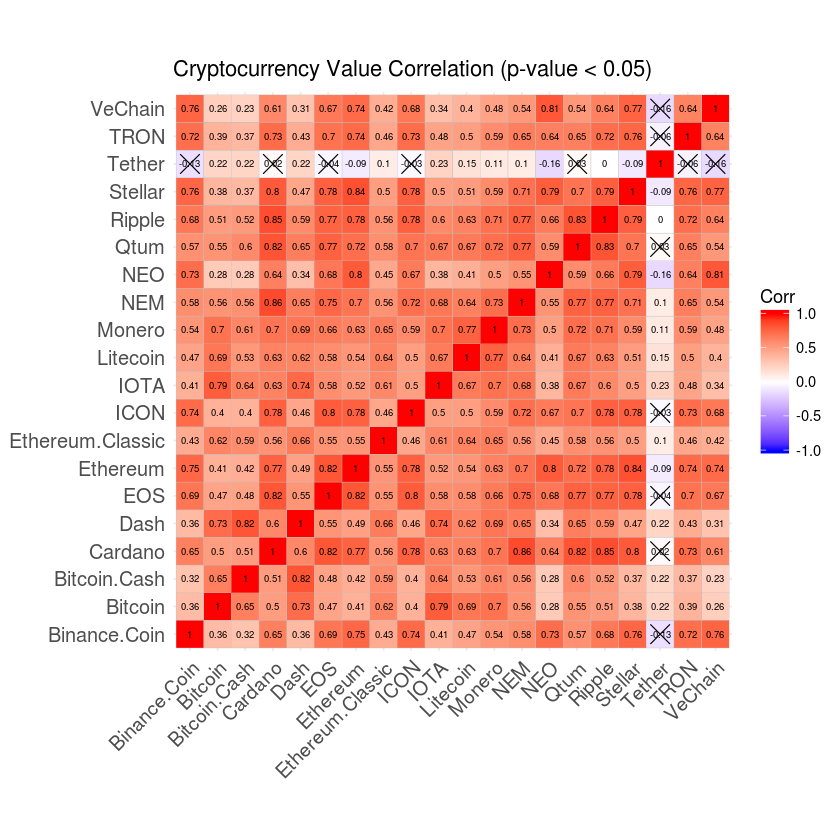

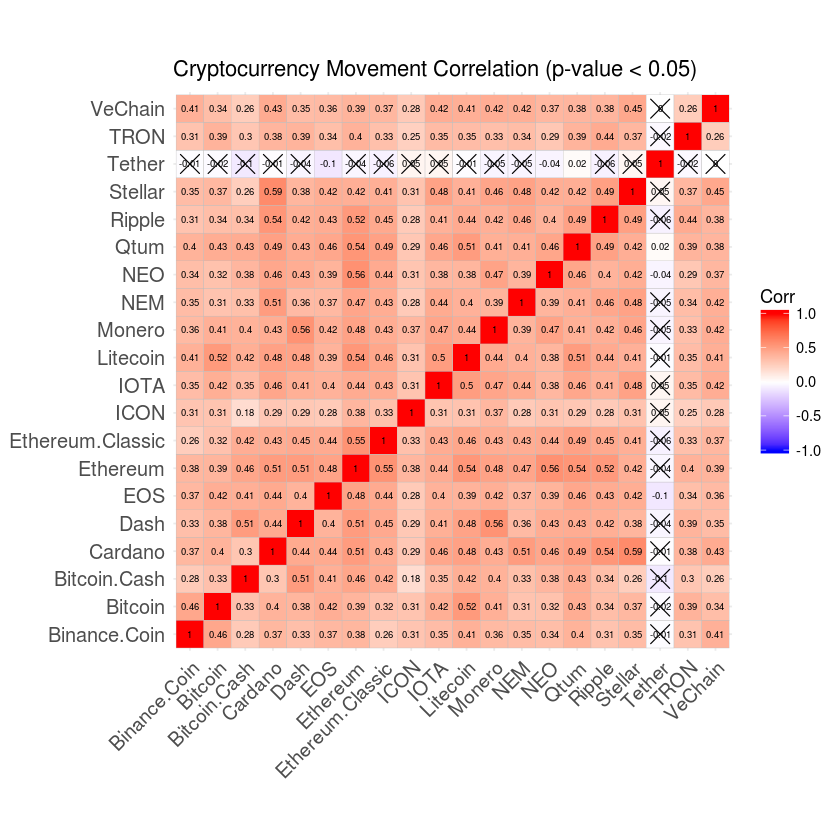

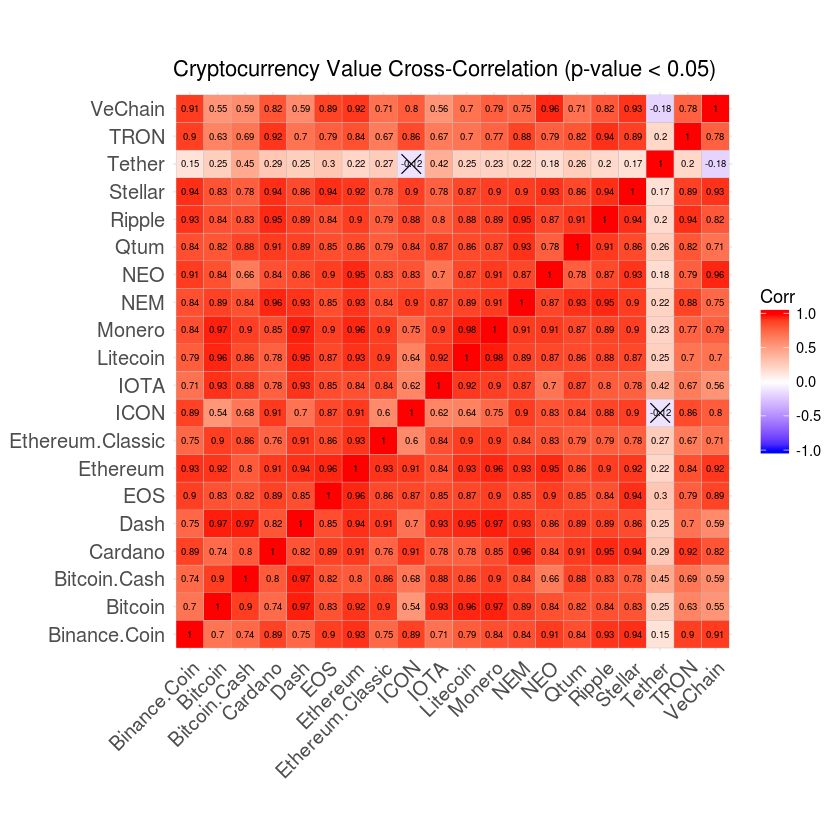

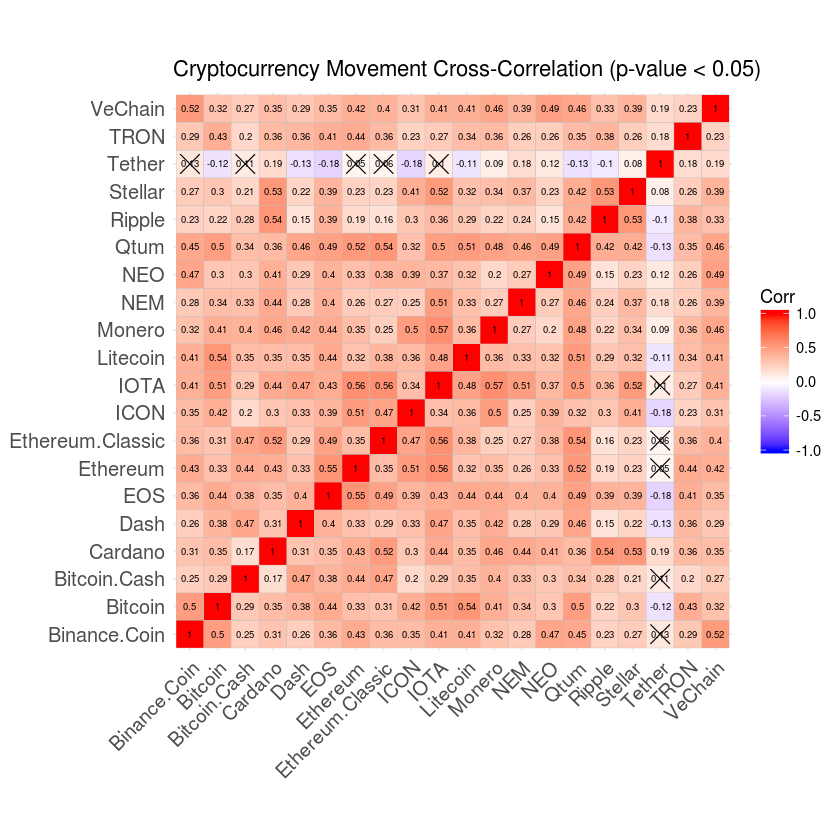

In [9]:
# Generate the pairwise correlation table between the 20 crypto-currencies
corrtbl.value <-correlationTable(pivotdf[,-1])
corrtbl.logrets <- correlationTable(logrets)

crosscorrtbl.value <- crossCorrelationTable(pivotdf[,-1])
crosscorrtbl.logrets <- crossCorrelationTable(logrets)

print(ggcorrplot(corrtbl.value$corr,  method="square", lab=TRUE, lab_size=2, p.mat=corrtbl.value$p.mat)+
     labs(title="Cryptocurrency Value Correlation (p-value < 0.05)"))

print(ggcorrplot(corrtbl.logrets$corr,  method="square", lab=TRUE, lab_size=2, p.mat=corrtbl.logrets$p.mat)+
     labs(title="Cryptocurrency Movement Correlation (p-value < 0.05)"))

print(ggcorrplot(crosscorrtbl.value$corr,  method="square", lab=TRUE, lab_size=2, p.mat=crosscorrtbl.value$p.mat)+
     labs(title="Cryptocurrency Value Cross-Correlation (p-value < 0.05)"))

print(ggcorrplot(crosscorrtbl.logrets$corr,  method="square", lab=TRUE, lab_size=2, p.mat=crosscorrtbl.logrets$p.mat)+
     labs(title="Cryptocurrency Movement Cross-Correlation (p-value < 0.05)"))

Examine lag values retured from the cross-correlation function. 

In [10]:
crosscorrtbl.value$lag

0,7,7,6,7,0,0,5,0,7,7,7,5,-2,7,7,3,7,2,-6
-7,0,-5,-7,0,-7,-7,0,-7,0,-5,-2,-7,-7,-7,-7,-7,4,-7,-7
-7,5,0,-7,0,-7,-7,0,-7,0,2,0,-7,-7,0,-7,-7,7,-7,-7
-6,7,7,0,7,0,-3,0,-5,7,6,0,0,-7,0,0,0,7,-1,-7
-7,0,0,-7,0,-7,-7,0,-7,0,0,0,-7,-7,0,-7,-7,7,-7,-7
0,7,7,0,7,0,0,0,0,7,7,7,7,-2,0,6,0,7,0,-7
0,7,7,3,7,0,0,0,0,7,0,0,6,-1,7,6,0,6,3,-7
-5,0,0,0,0,0,0,0,-5,0,0,0,0,-6,0,0,0,-3,0,-7
0,7,7,5,7,0,0,5,0,7,7,6,5,-6,7,6,0,-7,3,-6
-7,0,0,-7,0,-7,-7,0,-7,0,-6,-6,-7,-7,-7,-7,-7,-3,-7,-7
-7,5,-2,-6,0,-7,0,0,-7,6,0,0,-1,-7,-6,-7,-7,6,-7,-7


It appears that the different correlation methods give different results. 

In [11]:
threshold.value <- 0.7
threshold.logrets <- 0.5
threshold.x.value <- 0.9
threshold.x.logrets <- 0.5

getAdjacencyMatrix <- function(corr.tbl, threshold){
    adjMatrix <- corr.tbl$corr
    adjMatrix[ (corr.tbl$corr<threshold) | (corr.tbl$p.mat>=0.05)] <- 0
    diag(adjMatrix) <- 0

    adjMatrix[adjMatrix > threshold] <- 1
    
    return(adjMatrix)
}

adjMatrix.value <- getAdjacencyMatrix(corrtbl.value, threshold.value)
adjMatrix.logrets <- getAdjacencyMatrix(corrtbl.logrets, threshold.logrets)

adjMatrix.x.value <- getAdjacencyMatrix(crosscorrtbl.value, threshold.x.value)
adjMatrix.x.logrets <- getAdjacencyMatrix(crosscorrtbl.logrets, threshold.x.logrets)

ig.value <- graph_from_adjacency_matrix(adjMatrix.value, mode="undirected", weighted=NULL)
ig.logrets <- graph_from_adjacency_matrix(adjMatrix.logrets, mode="undirected", weighted=NULL)

ig.x.value <- graph_from_adjacency_matrix(adjMatrix.x.value, mode="undirected", weighted=NULL)
ig.x.logrets <- graph_from_adjacency_matrix(adjMatrix.x.logrets, mode="undirected", weighted=NULL)


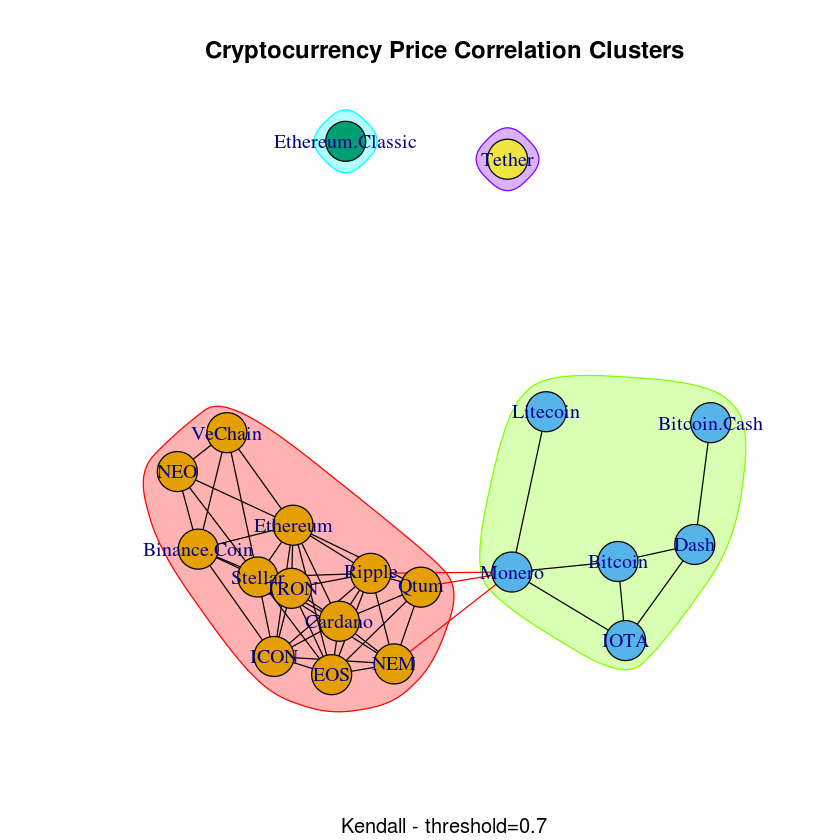

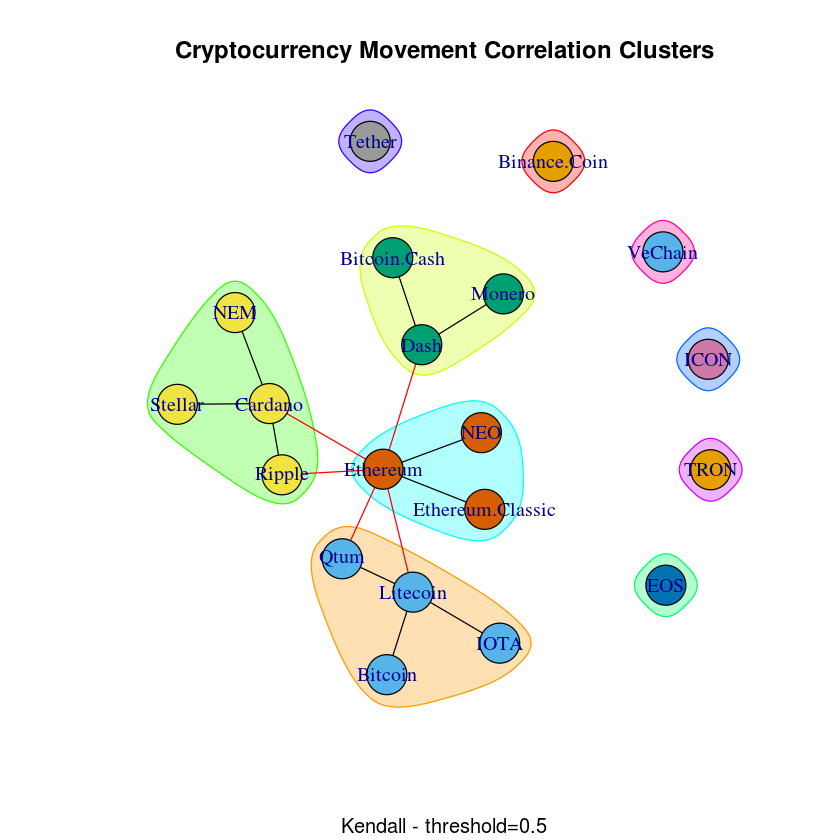

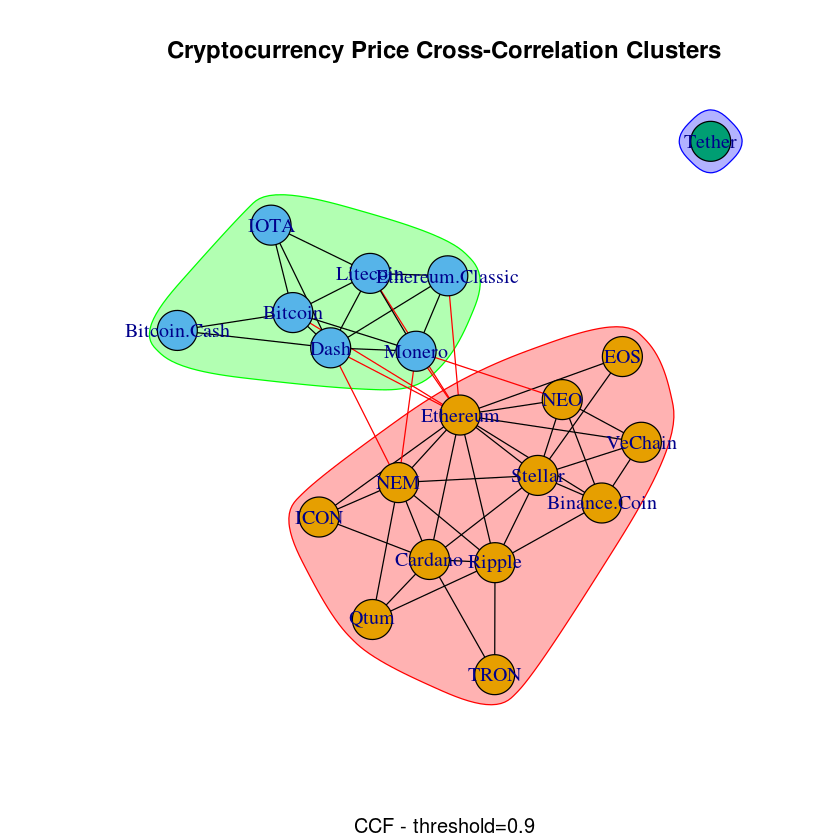

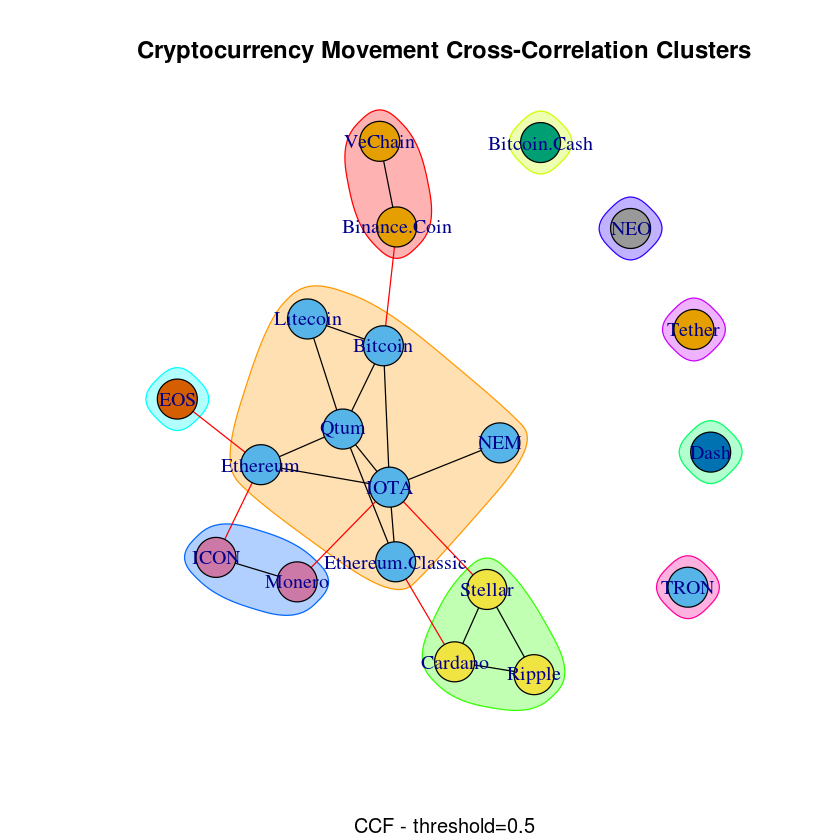

In [12]:
ceb.value <- cluster_edge_betweenness(ig.value)
ceb.logrets <- cluster_edge_betweenness(ig.logrets)

ceb.x.value <- cluster_edge_betweenness(ig.x.value)
ceb.x.logrets <- cluster_edge_betweenness(ig.x.logrets)

plot(ceb.value, ig.value, main="Cryptocurrency Price Correlation Clusters", sub=paste(sep="", "Kendall - threshold=", threshold.value))
plot(ceb.logrets, ig.logrets, main="Cryptocurrency Movement Correlation Clusters", sub=paste(sep="", "Kendall - threshold=", threshold.logrets))
plot(ceb.x.value, ig.x.value, main="Cryptocurrency Price Cross-Correlation Clusters", sub=paste(sep="", "CCF - threshold=", threshold.x.value))
plot(ceb.x.logrets, ig.x.logrets, main="Cryptocurrency Movement Cross-Correlation Clusters", sub=paste(sep="", "CCF - threshold=", threshold.x.logrets))

Plot some sample clustered currencies from **corr.values** (Kendall correlation on currency prices)

Warning message:
“Removed 4403 rows containing missing values (geom_path).”Warning message:
“Removed 1098 rows containing missing values (geom_path).”

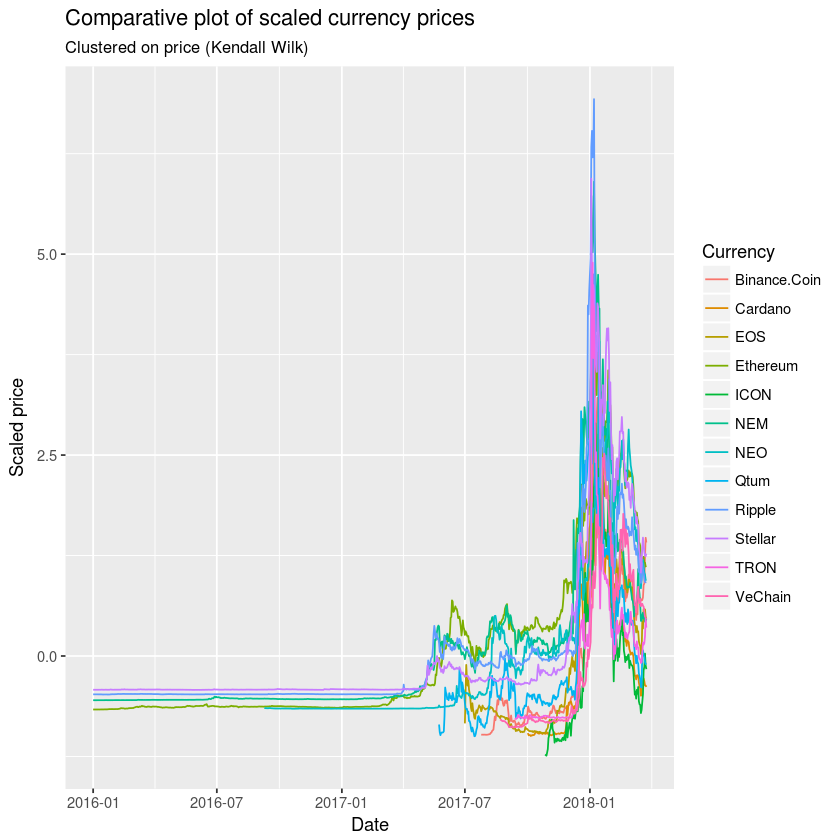

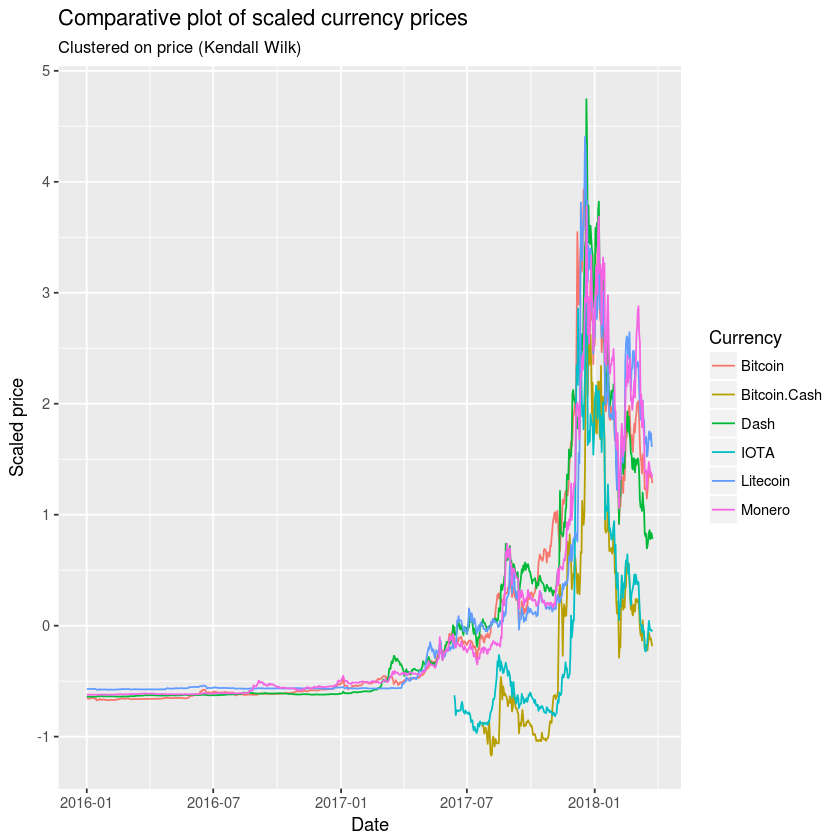

In [23]:
plot.currencies <- function(df, currencies, main.title, sub.title, ylabel, xlabel, scale=TRUE){
    tempdf <- df[, c("date", currencies)]
    if (scale) {
        tempdf[,-1] <- scale(tempdf[,-1], scale=TRUE)
    }

    tempdf = melt(tempdf, id.vars="date")

    # Plot them
    p<-ggplot(tempdf) + geom_line(aes(x = date, y = value, colour = variable))+
          labs(title = main.title, subtitle = sub.title, x = xlabel, y = ylabel)
    p$labels$colour <- "Currency"
    
    print(p)
          #ggtitle(main.title)+ylab(ylabel)+xlab(xlabel))
}

plot.currencies(pivotdf, ceb.value[[1]], "Comparative plot of scaled currency prices", "Clustered on price (Kendall Wilk)", "Scaled price", "Date")
plot.currencies(pivotdf, ceb.value[[2]], "Comparative plot of scaled currency prices", "Clustered on price (Kendall Wilk)", "Scaled price", "Date")



Plot some sample clustered currencies from **corr.logrets** (Kendall correlation on log returns)

Warning message:
“Removed 1038 rows containing missing values (geom_path).”Warning message:
“Removed 569 rows containing missing values (geom_path).”

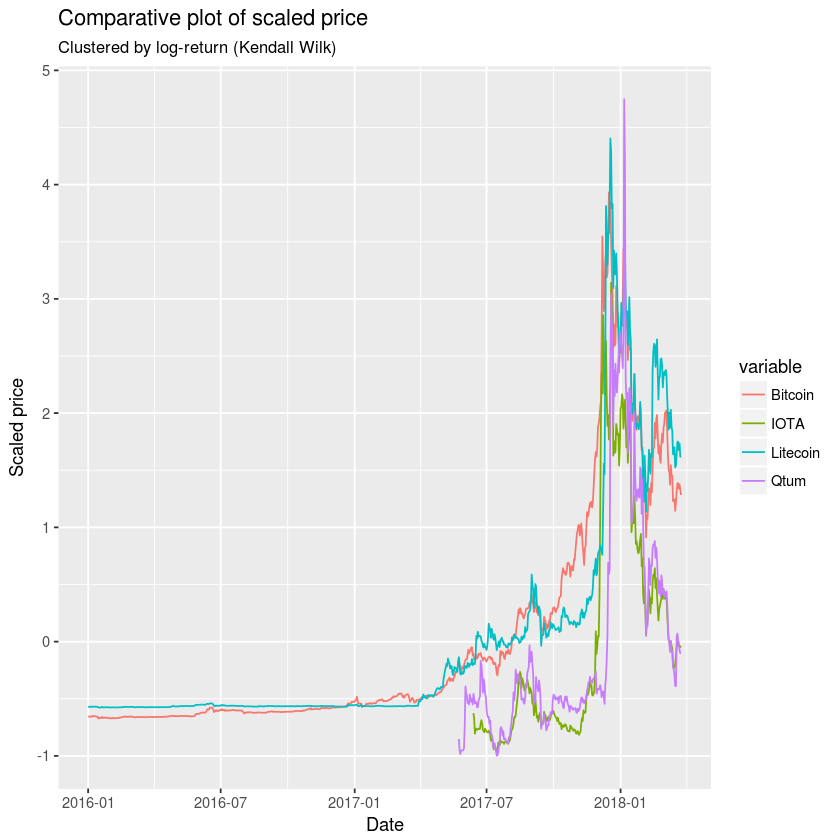

Warning message:
“Removed 639 rows containing missing values (geom_path).”

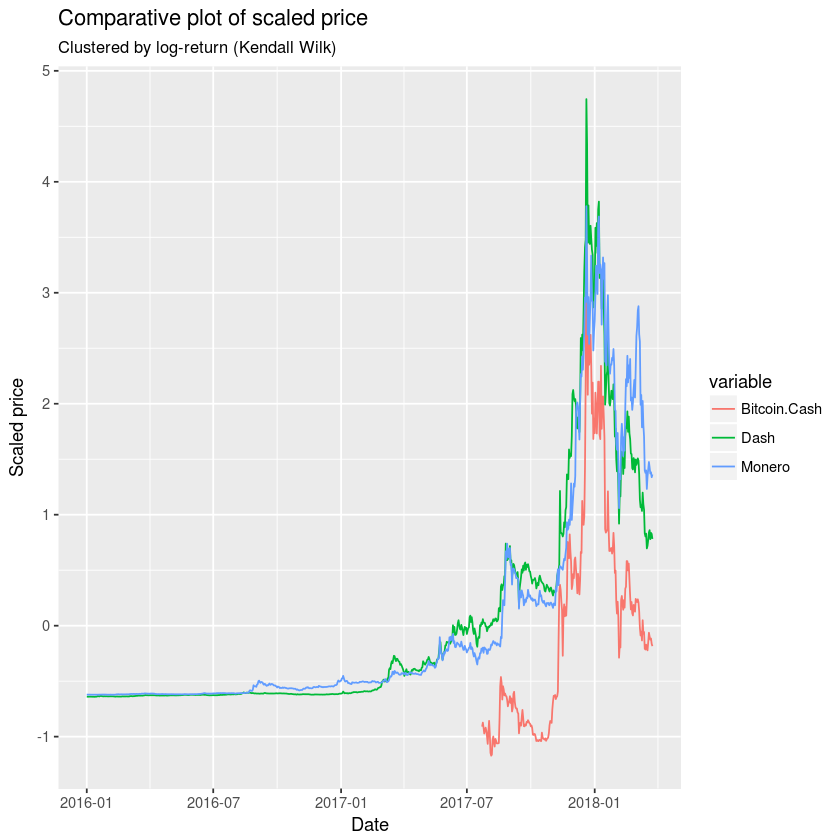

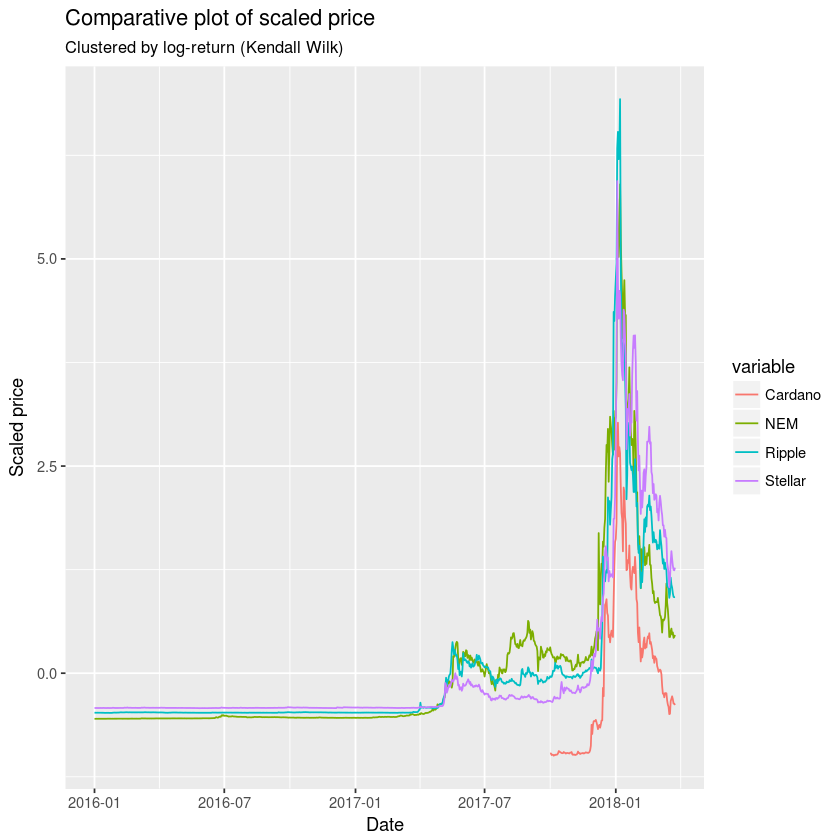

In [14]:
plot.currencies(pivotdf, ceb.logrets[[2]], "Comparative plot of scaled price", "Clustered by log-return (Kendall Wilk)", "Scaled price", "Date")
plot.currencies(pivotdf, ceb.logrets[[3]], "Comparative plot of scaled price", "Clustered by log-return (Kendall Wilk)", "Scaled price", "Date")
plot.currencies(pivotdf, ceb.logrets[[4]], "Comparative plot of scaled price", "Clustered by log-return (Kendall Wilk)", "Scaled price", "Date")

Plot some sample clustered currencies from **corr.x.logrets** (Cross-correlation on log returns)

Warning message:
“Removed 1243 rows containing missing values (geom_path).”Warning message:
“Removed 639 rows containing missing values (geom_path).”

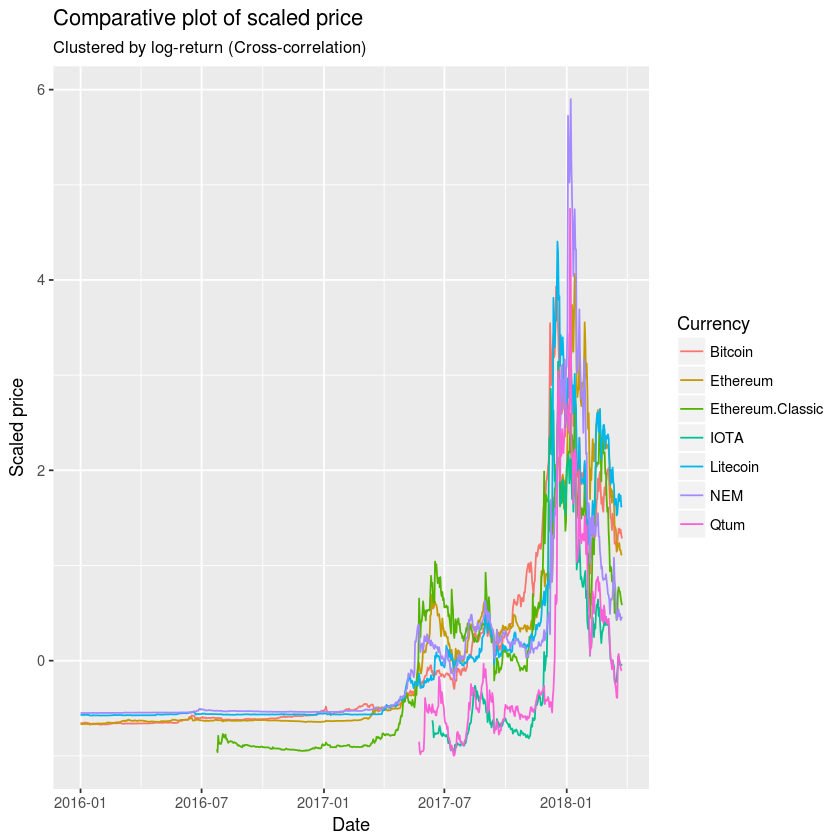

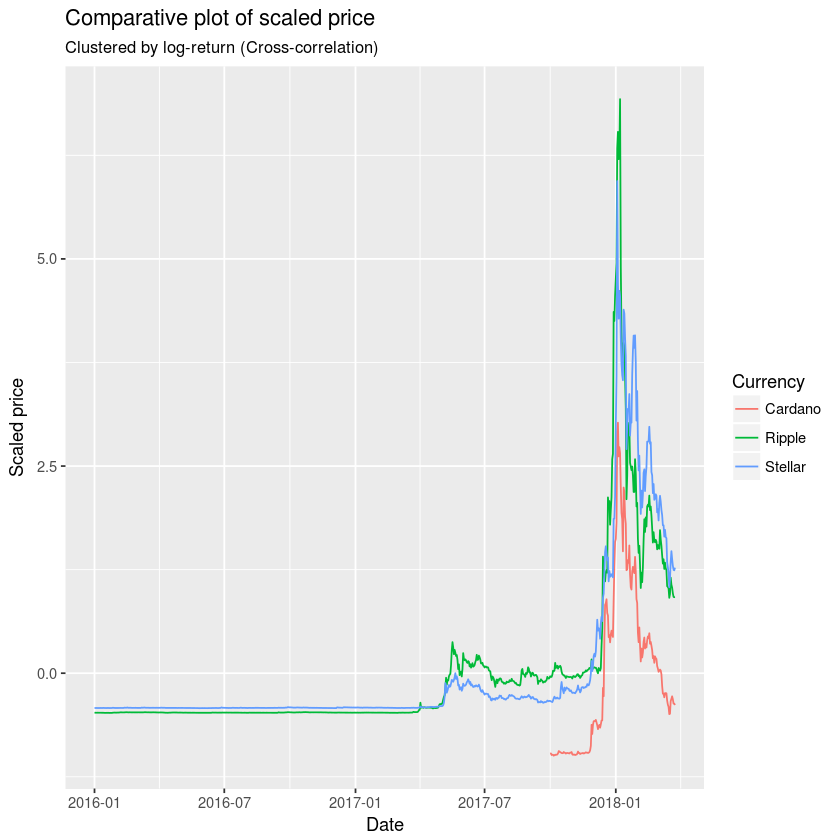

In [24]:
plot.currencies(pivotdf, ceb.x.logrets[[2]], "Comparative plot of scaled price", "Clustered by log-return (Cross-correlation)", "Scaled price", "Date")
plot.currencies(pivotdf, ceb.x.logrets[[4]], "Comparative plot of scaled price", "Clustered by log-return (Cross-correlation)", "Scaled price", "Date")

Plot the Tether currency which does not correlate with anything else versus a cluster of correlated cryptocurrencies for comparison.

Warning message:
“Removed 639 rows containing missing values (geom_path).”

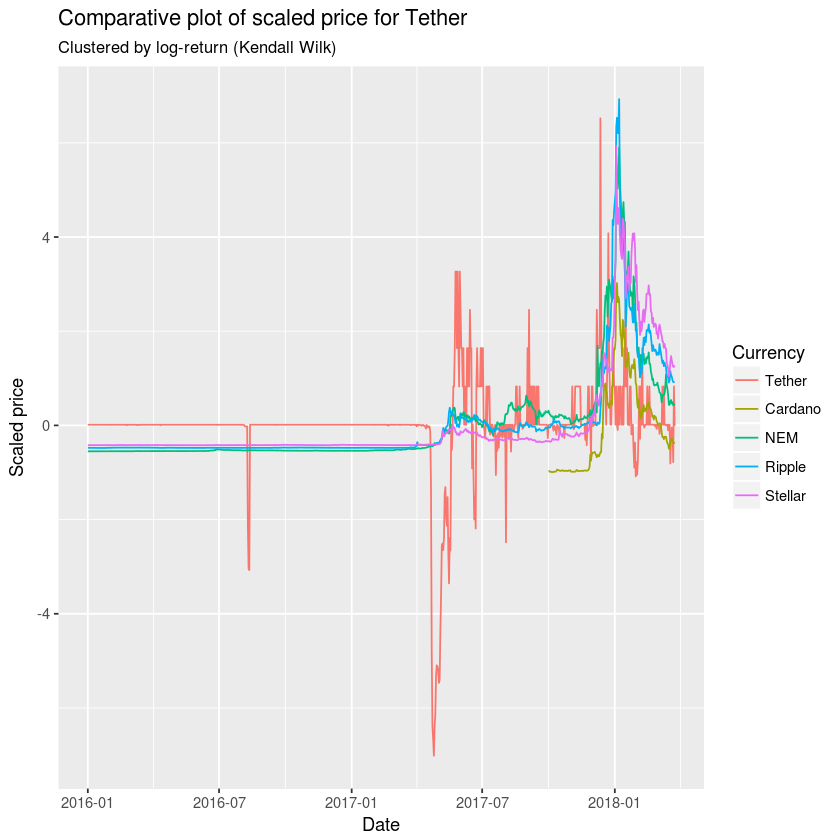

In [25]:
plot.currencies(pivotdf, c("Tether", ceb.logrets[[4]]), "Comparative plot of scaled price for Tether", "Clustered by log-return (Kendall Wilk)", "Scaled price", "Date")

Load historical data for three conventional currencies, EUR, GBP and JPY, all three referenced, like the cryptocurrencies, to the US Dollar.

In [27]:
##### Load conventional currencies ########################
df.eur = read.csv(file="data/EUR_USD Historical Data.csv", header=TRUE)
df.eur$Date <- as.Date(df.eur$Date, "%b %d, %Y")
df.eur <- df.eur[,c("Date", "Price")]
df.eur$Price <- as.numeric(df.eur$Price)
colnames(df.eur) <- c("date", "EUR")

df.gbp = read.csv(file="data/GBP_USD Historical Data.csv", header=TRUE)
df.gbp$Date <- as.Date(df.gbp$Date, "%b %d, %Y")
df.gbp <- df.gbp[,c("Date", "Price")]
df.gbp$Price <- as.numeric(df.gbp$Price)
colnames(df.gbp) <- c("date", "GBP")

df.jpy = read.csv(file="data/JPY_USD Historical Data.csv", header=TRUE)
df.jpy$Date <- as.Date(df.jpy$Date, "%b %d, %Y")
df.jpy <- df.jpy[,c("Date", "Price")]
df.jpy$Price <- as.numeric(df.jpy$Price)
colnames(df.jpy) <- c("date", "JPY")

We now compare the conventional currencies to Bitcoin. We choose Bitcoin because it has been historically considered representative of the Cryptocurrency market and statistically, according to all the correlation measures visualised above, it is correlated to at least a 0.3 level to all other cryptocurrencies being considered (except Tether which seems to be an exception and doesn't correlate to anything else).

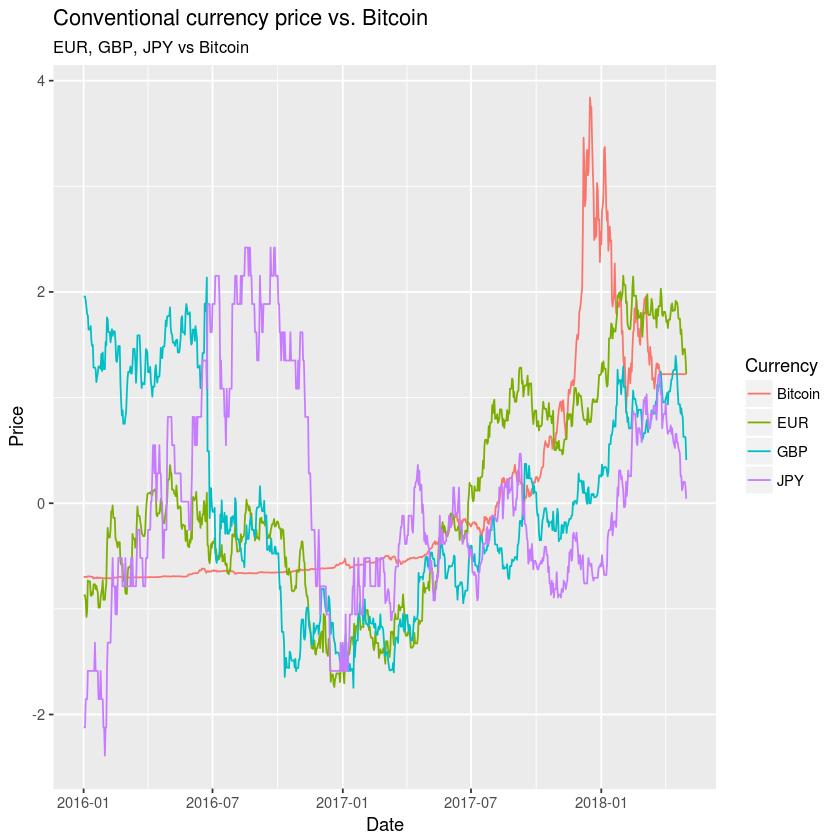

In [28]:
# Take bitcoin
conv.currencies <- pivotdf[,c("date", "Bitcoin")]
colnames(conv.currencies)[1] <- "date"
conv.currencies$Bitcoin <- as.numeric(conv.currencies$Bitcoin)

# Add our conventional currencies
conv.currencies <- merge(conv.currencies, merge(df.eur, merge(df.gbp, df.jpy, by="date", all=TRUE), by="date", all=TRUE), by="date", all=TRUE)
# Impute NA's with the previous value in the dataframe
conv.currencies[,-1] <- conv.currencies[,-1] %>% do(na.locf(.))


conv.currencies.logrets <- data.frame(
            diff(as.matrix(log(conv.currencies[,-1])))
        )

plot.currencies(conv.currencies, colnames(conv.currencies)[-1], "Conventional currency price vs. Bitcoin", "EUR, GBP, JPY vs Bitcoin", "Price", "Date")

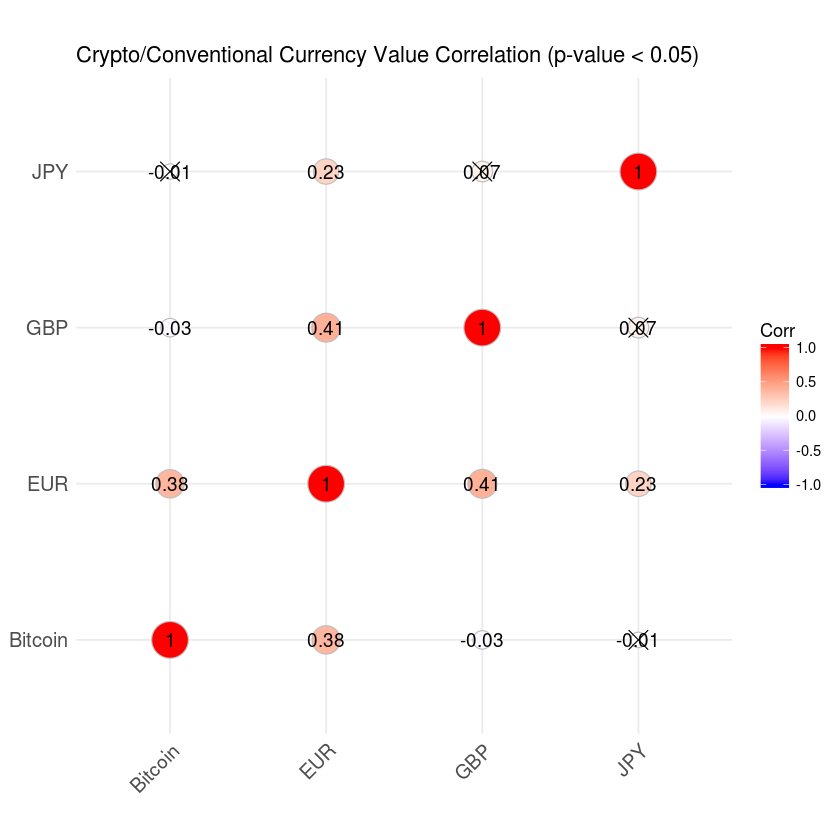

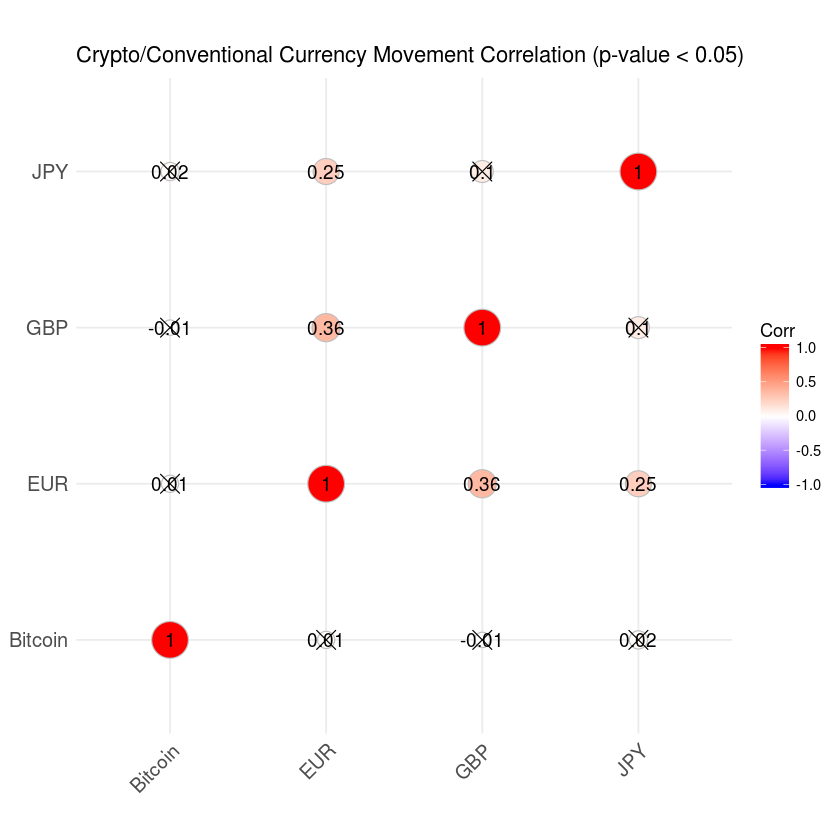

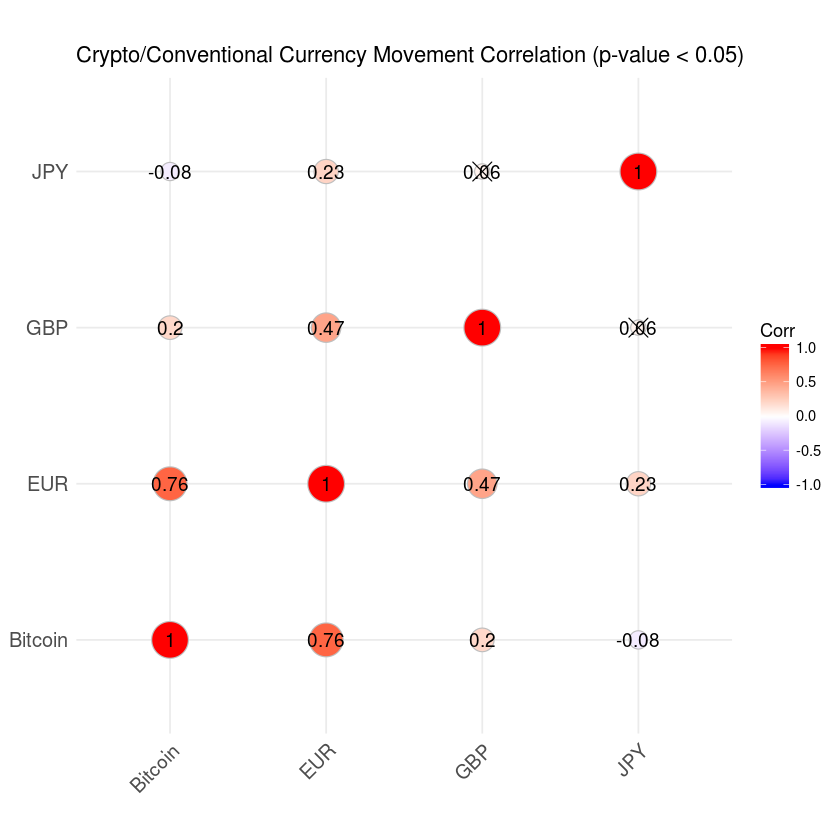

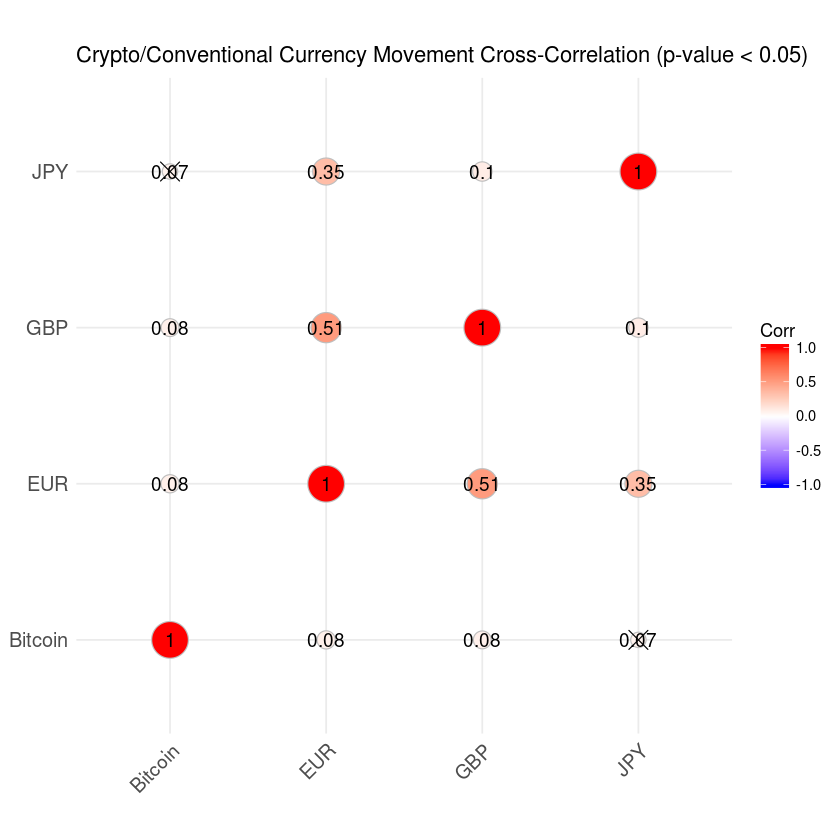

In [29]:
conv.corr.value <- correlationTable(conv.currencies[,-1])
conv.corr.logrets <- correlationTable(conv.currencies.logrets)
conv.corr.x.value <- crossCorrelationTable(conv.currencies[,-1])
conv.corr.x.logrets <- crossCorrelationTable(conv.currencies.logrets)

#corrplot(conv.corr$corr, type="lower", addCoef.col = "blue")
print(ggcorrplot(conv.corr.value$corr, method="circle", lab=TRUE, p.mat=conv.corr.value$p.mat) + 
    labs(title="Crypto/Conventional Currency Value Correlation (p-value < 0.05)"))
print(ggcorrplot(conv.corr.logrets$corr, method="circle", lab=TRUE, p.mat=conv.corr.logrets$p.mat) + 
    labs(title="Crypto/Conventional Currency Movement Correlation (p-value < 0.05)"))
print(ggcorrplot(conv.corr.x.value$corr, method="circle", lab=TRUE, p.mat=conv.corr.x.value$p.mat) +
    labs(title="Crypto/Conventional Currency Movement Correlation (p-value < 0.05)"))
print(ggcorrplot(conv.corr.x.logrets$corr, method="circle", lab=TRUE, p.mat=conv.corr.x.logrets$p.mat) +
    labs(title="Crypto/Conventional Currency Movement Cross-Correlation (p-value < 0.05)"))

#plot(x=conv.currencies.scaled[,"Bitcoin"], y=conv.currencies.scaled[,"Price.jpy"])

In [31]:
conv.currencies$date <- as.Date(conv.currencies$date, "%Y-%m-%d")

conv.currencies <- conv.currencies %>% filter(date >= "2017-01-01")
conv.currencies.logrets <- data.frame(
            diff(as.matrix(log(conv.currencies[,-1])))
        )

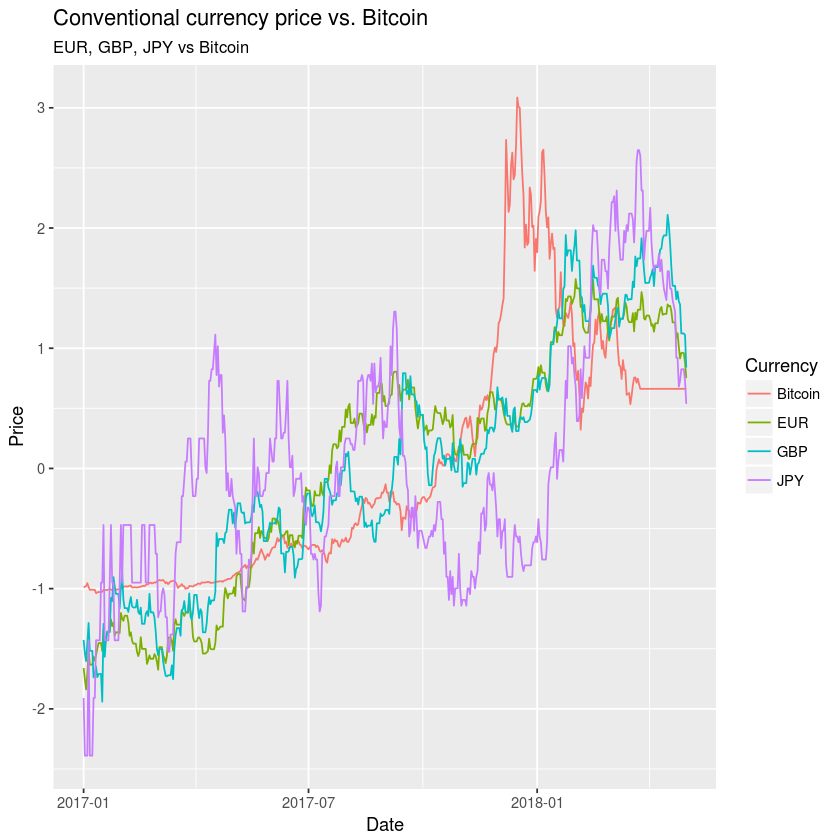

In [32]:
plot.currencies(conv.currencies, colnames(conv.currencies)[-1], "Conventional currency price vs. Bitcoin", "EUR, GBP, JPY vs Bitcoin", "Price", "Date")

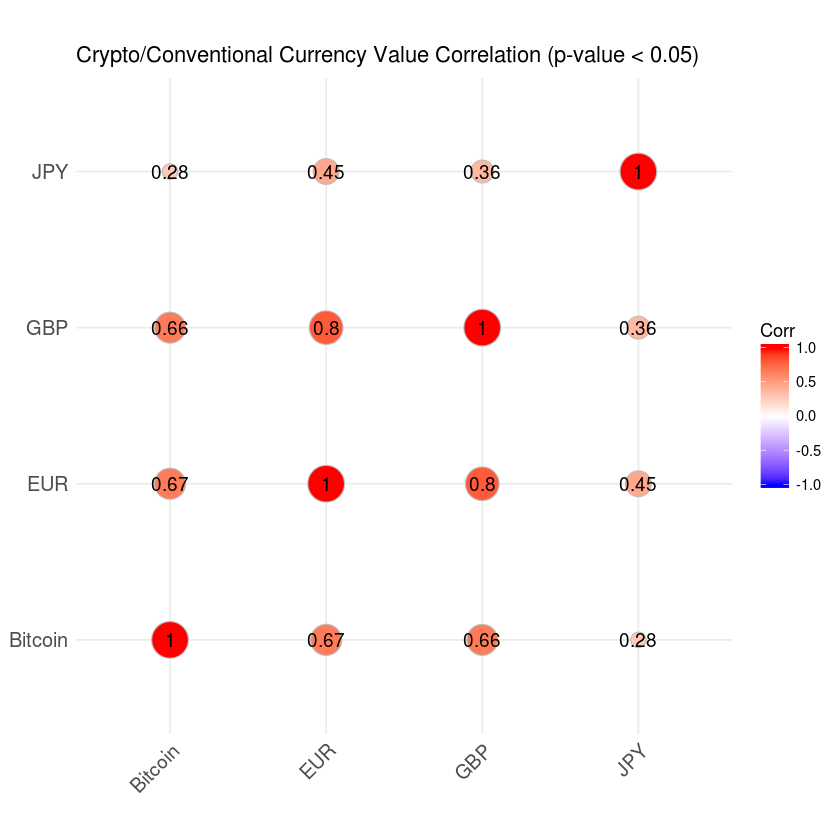

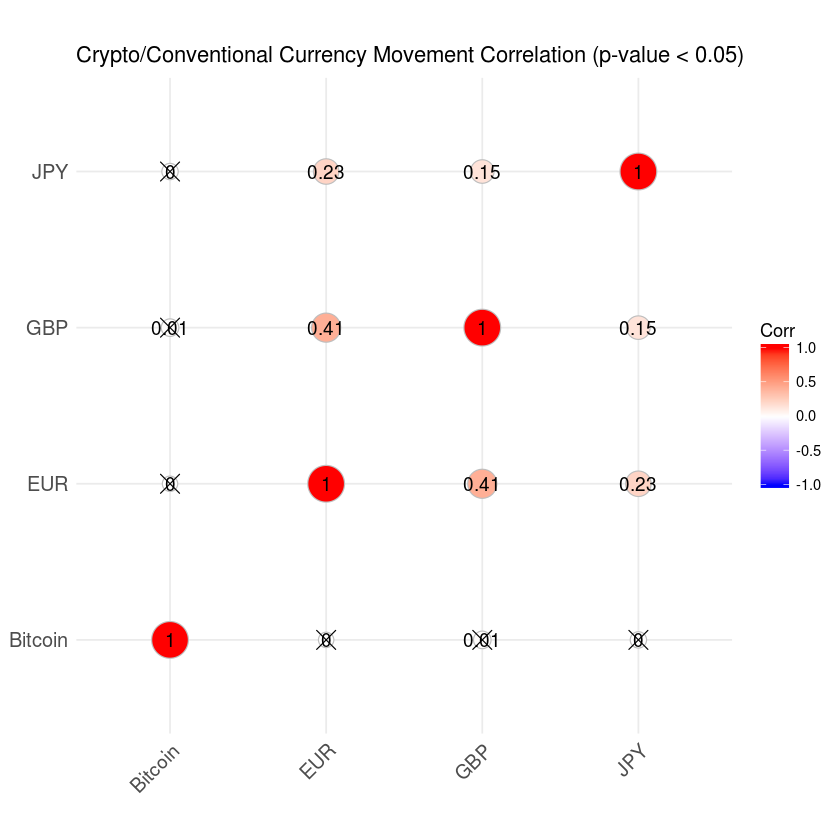

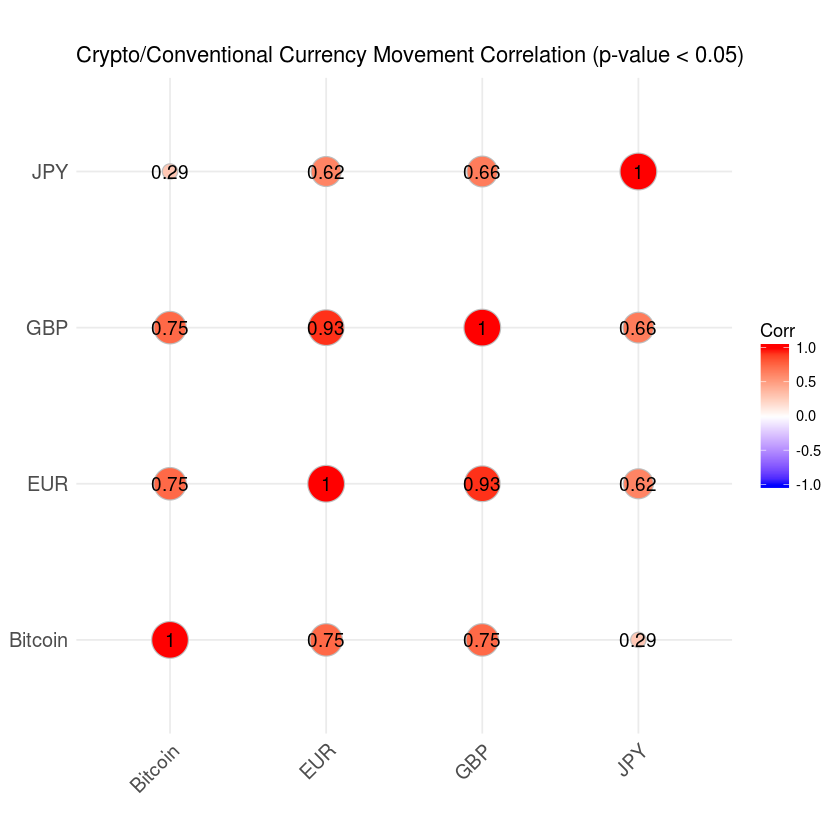

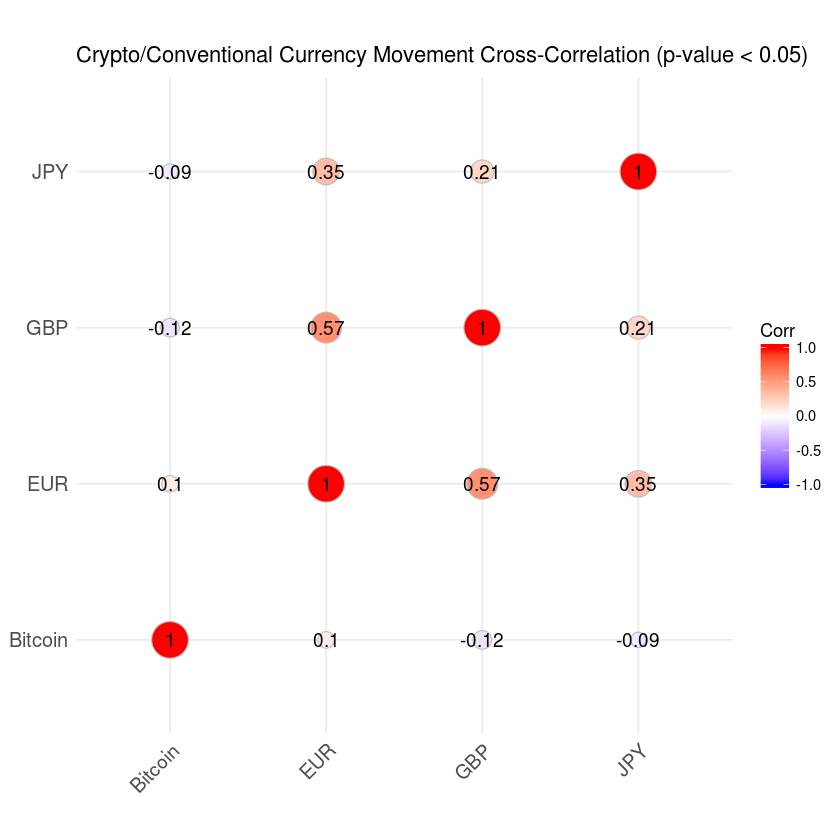

In [33]:
conv.corr.value <- correlationTable(conv.currencies[,-1])
conv.corr.logrets <- correlationTable(conv.currencies.logrets)
conv.corr.x.value <- crossCorrelationTable(conv.currencies[,-1])
conv.corr.x.logrets <- crossCorrelationTable(conv.currencies.logrets)

#corrplot(conv.corr$corr, type="lower", addCoef.col = "blue")
print(ggcorrplot(conv.corr.value$corr, method="circle", lab=TRUE, p.mat=conv.corr.value$p.mat) + 
    labs(title="Crypto/Conventional Currency Value Correlation (p-value < 0.05)"))
print(ggcorrplot(conv.corr.logrets$corr, method="circle", lab=TRUE, p.mat=conv.corr.logrets$p.mat) + 
    labs(title="Crypto/Conventional Currency Movement Correlation (p-value < 0.05)"))
print(ggcorrplot(conv.corr.x.value$corr, method="circle", lab=TRUE, p.mat=conv.corr.x.value$p.mat) +
    labs(title="Crypto/Conventional Currency Movement Correlation (p-value < 0.05)"))
print(ggcorrplot(conv.corr.x.logrets$corr, method="circle", lab=TRUE, p.mat=conv.corr.x.logrets$p.mat) +
    labs(title="Crypto/Conventional Currency Movement Cross-Correlation (p-value < 0.05)"))

In [39]:
(1-pnorm(2.33))

[1] 0.009903076